# Traitement et analyse de la liste des musiques avant récupération

## Paquets utilisés

In [1]:
import pandas as pd

## Suppression des doublons

In [2]:
songs: pd.Series

print("Removing duplicated songs...", "\n\n")

with open("./datas/songs.txt", "r", encoding="utf8") as file:
    songs_inputs = file.read().splitlines()
    songs = pd.Series(songs_inputs)

    print("Before", "\n", songs, "\n", "...", "\n\n")
    
    # Remove duplicated songs (keep the first)
    songs.drop_duplicates(inplace=True)

    print("After", "\n", songs, "\n", "...")

    with open("./datas/songs.txt", "w", encoding="utf8") as file:
        file.write("\n".join(songs))
        file.close()

    file.close()

Removing duplicated songs... 


Before 
 0                 Josman - F*cked Up 4
1                        Josman - Doré
2                   Josman - Décisions
3                         Josman - SEC
4       Josman - New Hares (Same Sh!t)
                     ...              
1825                    Di-Meh - Gâtée
1826                 Di-Meh - Week-end
1827                Di-Meh - Full Drip
1828                  Di-Meh - Daytona
1829         Di-Meh - 4x4 Diplomatique
Length: 1830, dtype: object 
 ... 


After 
 0                 Josman - F*cked Up 4
1                        Josman - Doré
2                   Josman - Décisions
3                         Josman - SEC
4       Josman - New Hares (Same Sh!t)
                     ...              
1825                    Di-Meh - Gâtée
1826                 Di-Meh - Week-end
1827                Di-Meh - Full Drip
1828                  Di-Meh - Daytona
1829         Di-Meh - 4x4 Diplomatique
Length: 1830, dtype: object 
 ...


## Représentation des artistes

In [3]:
df_songs = songs.str.split(" - ", expand=True, n=1)
df_songs.columns=["artist", "song"]

# Group the songs by artists
df_artists_songs = df_songs.groupby("artist")["song"].apply(list).reset_index(name="songs")

df_artists_songs["songs_count"] = df_artists_songs["songs"].apply(lambda x: len(x))

df_artists_songs.sort_values(by="songs_count", inplace=True, ascending=False)

df_artists_songs

,artist,songs,songs_count
46,PNL,"[DA, Naha, Dans la légende, Mira, J'suis QLF, ...",70
40,Nekfeu,"[Les étoiles vagabondes, Alunissons, Cheum, Na...",68
51,SCH,"[Gibraltar, Marché noir, Fournaise, Aluminium,...",67
10,Damso,"[Ο. OG, Π. VANTABLACK, Ρ. DOSE, Σ. MOROSE, Τ. ...",58
35,Lomepal,"[Palpal, 70, Lucy, Pommade, Ray Liotta, Ça com...",56
...,...,...,...
28,Kery James,"[Si c'était à refaire, Parce que, Ce""A""d'avili...",12
22,Jazzy Bazz,"[Crépuscule, El Presidente, Éternité, Leticia,...",12
30,Krisy,"[Vol vers, Discussion nocturne, Blessed, Parad...",9
56,Swing,"[N., Brousse, S'en aller, Pas besoin de raison...",7


<AxesSubplot:xlabel='artist'>

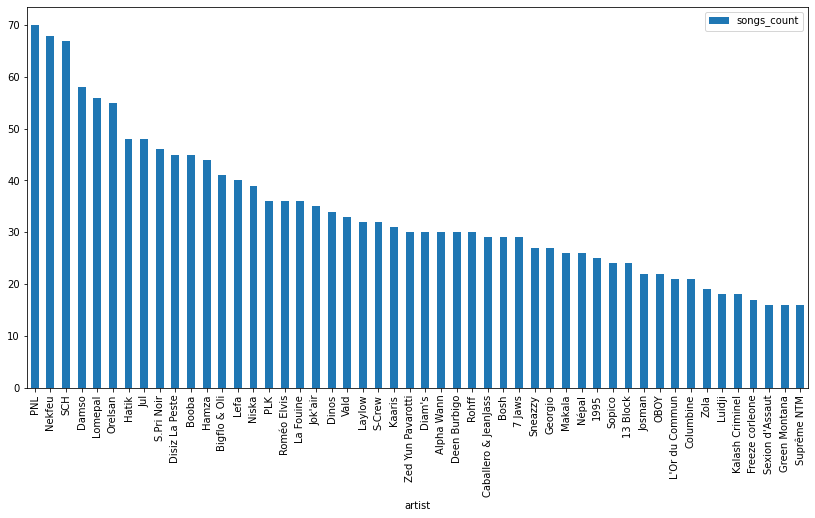

In [4]:
df_artists_songs[:50].plot(kind="bar", x="artist", y="songs_count", figsize=(14, 7))